In [40]:
import numpy                  as np
import pandas                 as pd
import scipy                  as sp
import sklearn.neighbors      as knn
import matplotlib
import matplotlib.pyplot      as plt
import seaborn
import requests
import urllib
import joblib
import requests
import json
import os
import random
import seaborn as sns
#import statsmodels.api as sm
from matplotlib                           import rcParams
from sklearn                              import discriminant_analysis
from sklearn.decomposition                import PCA
from sklearn                              import preprocessing
from sklearn.linear_model                 import LogisticRegression as LogReg
from sklearn.discriminant_analysis        import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis        import QuadraticDiscriminantAnalysis as QDA
from scipy.stats                          import mode
from sklearn                              import linear_model
from IPython.core.interactiveshell        import InteractiveShell
from time                                 import sleep
from collections                          import Counter
from itertools                            import combinations, permutations

%matplotlib inline

In [41]:
#importing dataset and clean missing values and duplicates

import pandas as pd
df = pd.read_csv('MovieGenre.csv', encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])
df.set_index(["imdbId"], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(subset="Poster", keep=False, inplace=True)
df  

,Title,Genre,Poster
imdbId,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...


In [42]:
# extract movie's year information as a separate column 

import re

re_year = re.compile("\((\d{4})\)")
df["year"] = df.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)
df

,Title,Genre,Poster,year
imdbId,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0


In [43]:
#separate genre types to multiple columns
df.columns
df[['maingenre','genre2','genre3']] = df.Genre.str.split("|",expand=True,)
df

,Title,Genre,Poster,year,maingenre,genre2,genre3
imdbId,,,,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0,Action,Thriller,None
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0,Drama,None,None
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0,Comedy,None,None


In [44]:
df.count

<bound method DataFrame.count of                                      Title                       Genre  \
imdbId                                                                   
114709                    Toy Story (1995)  Animation|Adventure|Comedy   
113497                      Jumanji (1995)     Action|Adventure|Family   
113228             Grumpier Old Men (1995)              Comedy|Romance   
114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...                                    ...                         ...   
83291                Los violadores (1981)             Action|Thriller   
83168                Tanya's Island (1980)                       Drama   
82875                Pacific Banana (1981)                      Comedy   
815258  Werewolf in a Womens Prison (2006)                      Horror   
79142               Xiao zi ming da (1979)               Action|Comedy   

    

In [45]:
#count values for each genre
genre_df=df['maingenre'].value_counts()
genre_df

Drama          9457
Comedy         9327
Action         4556
Documentary    3379
Crime          2434
Horror         1903
Adventure      1617
Animation      1565
Biography      1155
Thriller        390
Short           358
Western         304
Fantasy         269
Mystery         251
Family          241
Romance         197
Sci-Fi          187
Musical         113
War              63
Music            36
History          20
Film-Noir        16
Adult             7
Talk-Show         3
Sport             2
Name: maingenre, dtype: int64

In [46]:
#put genre value counts in dataframe
genre_count = pd.DataFrame(genre_df).reset_index()
genre_count

,index,maingenre
0,Drama,9457
1,Comedy,9327
2,Action,4556
3,Documentary,3379
4,Crime,2434
5,Horror,1903
6,Adventure,1617
7,Animation,1565
8,Biography,1155
9,Thriller,390


In [47]:
#rename genre and counts for plotting
genre_count.columns = ['genre','count']
genre_count

,genre,count
0,Drama,9457
1,Comedy,9327
2,Action,4556
3,Documentary,3379
4,Crime,2434
5,Horror,1903
6,Adventure,1617
7,Animation,1565
8,Biography,1155
9,Thriller,390


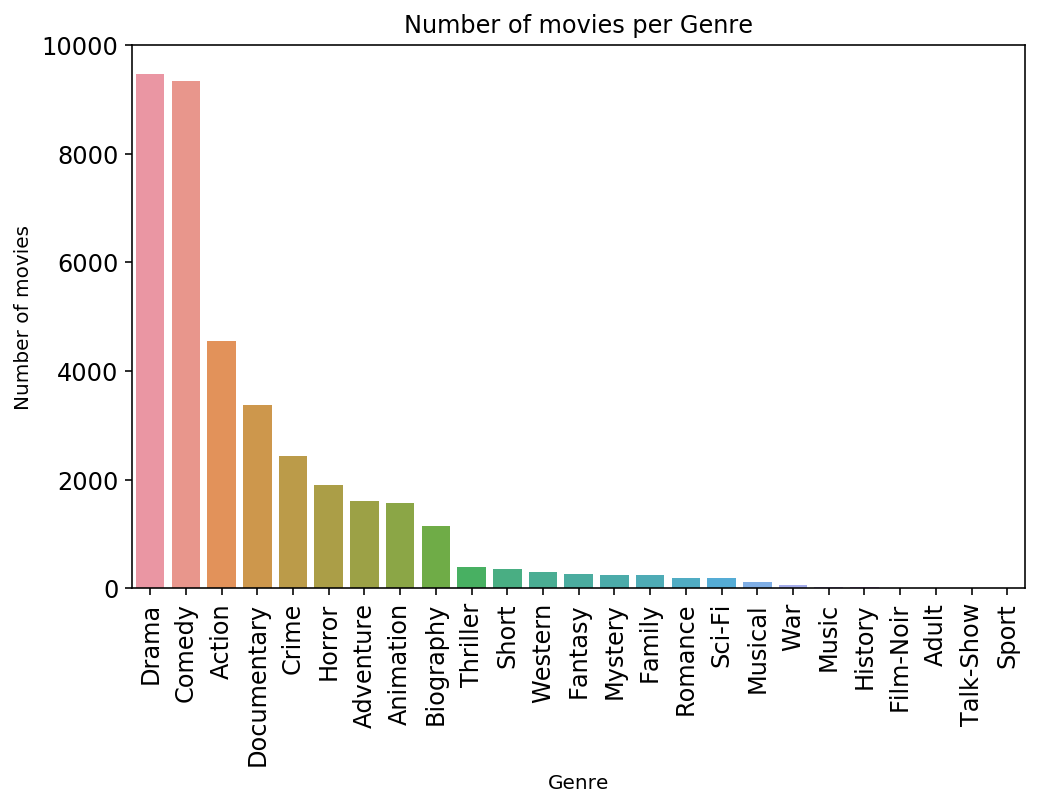

In [48]:
#plotting 
genre_count.sort_values(by="count", ascending=False, inplace=True)

plt.subplots(figsize=(8,5));
sns.barplot(x="genre", y="count", data=genre_count);
plt.xticks(rotation="vertical");
plt.xlabel("Genre");
plt.ylabel("Number of movies");
plt.title("Number of movies per Genre");
plt.ylim((0,10000));

In [10]:
## METHOD 1 FOR IMAGE PROCESSING 

In [49]:
#prepare dataset for image processing 
# Data manipulation
import pandas as pd
import numpy as np

## Image processing
# import skimage

# Data preprocessing
from sklearn.model_selection import train_test_split
#from skmultilearn.model_selection import IterativeStratification, iterative_train_test_split

# Modelling
import keras 
import keras.backend as K
from keras.callbacks import TensorBoard
from keras import optimizers
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

# Transfer Learning
from keras.applications import MobileNet, VGG16

# Model Evaluation
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import hamming_loss, label_ranking_loss, average_precision_score 

# Plotting & Data visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pre-configure Plotting Style 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
%config InlineBackend.figure_format = 'retina'

# Miscellaneous
import os
import time
import random
import itertools 
from tqdm import tqdm
from collections import Counter

In [50]:
import os
from sklearn.model_selection import train_test_split

import urllib.request
from urllib.error import HTTPError

import PIL

In [20]:
df.shape

(37850, 7)

In [38]:
def read_and_clean_data(path):
    df = pd.read_csv(path, encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])
    df.set_index(["imdbId"], inplace=True)
    #print(f"Shape of the original dataset: {df.shape}")
    df.dropna(inplace=True)
    #print(f"Shape after dropping rows with missing values: {df.shape}")
    df.drop_duplicates(subset="Poster", keep=False, inplace=True)
    #print(f"Shape after dropping rows with potentially misleading poster link: {df.shape}\n")
    return df

In [39]:
def add_year_variable(df):
    re_year = re.compile("\((\d{4})\)")
    df["year"] = df.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)
    #print(f"There are movies between {int(np.min(df.year))} and {int(np.max(df.year))} available in the dataset.\n")
    return df

In [40]:
def create_boolean_genres(df):
    df["Genre"] = df.Genre.map(lambda x: x.split("|"))
    all_genres = set([item for l in df.Genre for item in l])
    #print(f"There are {len(all_genres)} genres in the dataset: {all_genres}\n")
    for genre in all_genres:
        new_var = "is_" + re.sub(r'\W+', '', genre.lower())
        df[new_var] = df.Genre.map(lambda x: genre in x)
    df.drop(["Genre"], axis=1, inplace=True)
    return df

In [41]:
def select_years(df, min_year=1950, max_year=2000, add_decades=True):
    df_range = df.copy().loc[(df.year >= min_year) & (df.year < max_year)]
    #print(f"Movies left between {min_year} and {max_year}: {df_range.shape[0]}")
    if add_decades:
        df_range["decade"] = df_range.year.apply(lambda x: str(int(x))[2] +"0s")
        #print(f"Movies per decade in the dataset:\n{df_range.decade.value_counts()}\n")
    return df_range

In [42]:
def extract_genre_data(df, genre="Action"):
    filter_var = "is_" + re.sub(r'\W+', '', genre.lower())
    df_genre = df.copy().loc[df[filter_var]]
    #print(f"{genre} movies in the dataset: {df_genre.shape[0]}\n")
    return df_genre

In [43]:
def sample_same_number_per_decade(df, use_test_sample=False):
    min_number = 40 if use_test_sample else np.min(df.decade.value_counts())
    df_sample = df.groupby("decade").apply(lambda x: x.sample(min_number))
    #print(f"Sample includes {min_number} movies per decade")
    return df_sample

In [44]:
movie_data = read_and_clean_data(path="MovieGenre.csv")
movie_data = add_year_variable(movie_data)
movie_data = create_boolean_genres(movie_data)
action_movies = extract_genre_data(movie_data, "Action")
action_movies = select_years(action_movies, 1970, 2018)
action_sample = sample_same_number_per_decade(action_movies, use_test_sample=False)

In [45]:
def create_train_and_test_dfs(df, prop_test=.2):
    train, test = train_test_split(df, test_size=prop_test, stratify=df.decade)
    print("Number of movies in training data", train.shape[0])
    print("Number of movies in testing data",  test.shape[0])
    return {"train": train, "test": test}

In [46]:

def create_folder_structure(image_folder="poster", splits=["train", "test"], classes=None):
    for s in splits:
        for c in classes:
            folder_name = "//".join([image_folder, s, c])
            try:
                os.makedirs(folder_name)
            except FileExistsError:
                print(folder_name," already exists.")
        print("\n")

In [47]:
def download_posters(df, image_folder="poster"):
    for k, df in df.items():
        print("Starting with downloading files for", k)
        already_downloaded = 0
        http_errors = []
        for index, movie in df.iterrows():
            movie_id = str(index[1])
            movie_decade = index[0]
            file_name = movie_id + ".jpg"
            file_path = "//".join([image_folder, k, movie_decade, file_name])
            if os.path.isfile(file_path):
                already_downloaded += 1
            else:
                try:
                    urllib.request.urlretrieve(movie.Poster, file_path)       
                except HTTPError:
                    http_errors.append(movie_id)
        print(len(http_errors)," posters had an HTTPError.")
        print(already_downloaded,"posters were downloaded before")
        count = 0
        for root, dirs, files in os.walk("//".join([image_folder, k])):
            if len(dirs) == 0:
                count += len(files)
                print("Number of pictures in", root,len(files))
        print("Total number of pictures available for", k, count)

In [48]:
def delete_black_and_white_posters(image_folder=None):
    print("Checking for black and white pictures in", image_folder)
    count = 0
    for root, dirs, files in os.walk(image_folder):
        if len(files) > 0:
            for f in files:
                file_path = "//".join([root, f])
                if np.asarray(PIL.Image.open(file_path)).shape != (268, 182, 3):
                    os.remove(file_path)
                    count += 1
    print("Files without RGB and therefore deleted", count)

In [58]:
image_folder = "poster"
dfs = create_train_and_test_dfs(action_sample)
create_folder_structure(image_folder, dfs.keys(), set(action_sample.decade))
download_posters(dfs)
delete_black_and_white_posters(image_folder)

Number of movies in training data 1876
Number of movies in testing data 469
poster//train//70s  already exists.
poster//train//80s  already exists.
poster//train//90s  already exists.
poster//train//00s  already exists.
poster//train//10s  already exists.


poster//test//70s  already exists.
poster//test//80s  already exists.
poster//test//90s  already exists.
poster//test//00s  already exists.
poster//test//10s  already exists.


Starting with downloading files for train
120  posters had an HTTPError.
1399 posters were downloaded before
Number of pictures in poster//train/70s/.ipynb_checkpoints 3
Number of pictures in poster//train/90s/.ipynb_checkpoints 2
Number of pictures in poster//train/00s 422
Number of pictures in poster//train/10s 446
Number of pictures in poster//train/80s 404
Total number of pictures available for train 1277
Starting with downloading files for test
30  posters had an HTTPError.
84 posters were downloaded before
Number of pictures in poster//test/70s 160
Numb

In [59]:
dfs.shape

AttributeError: 'dict' object has no attribute 'shape'

In [11]:
# METHOD 2 FOR IMAGE PROCESSING

In [51]:
#Imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df.shape

(37850, 7)

In [53]:
df.columns

Index(['Title', 'Genre', 'Poster', 'year', 'maingenre', 'genre2', 'genre3'], dtype='object')

In [54]:
df2 = df.reset_index()
df2

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...,...
37845,83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0,Action,Thriller,None
37846,83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0,Drama,None,None
37847,82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0,Comedy,None,None
37848,815258,Werewolf in a Womens Prison (2006),Horror,https://images-na.ssl-images-amazon.com/images...,2006.0,Horror,None,None


In [55]:
df2.shape

(37850, 8)

In [56]:
df2.columns

Index(['imdbId', 'Title', 'Genre', 'Poster', 'year', 'maingenre', 'genre2',
       'genre3'],
      dtype='object')

In [57]:
df2['imdbId'] = df2['imdbId'].astype(str)

In [58]:
df2.info

<bound method DataFrame.info of        imdbId                               Title                       Genre  \
0      114709                    Toy Story (1995)  Animation|Adventure|Comedy   
1      113497                      Jumanji (1995)     Action|Adventure|Family   
2      113228             Grumpier Old Men (1995)              Comedy|Romance   
3      114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
4      113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...       ...                                 ...                         ...   
37845   83291               Los violadores (1981)             Action|Thriller   
37846   83168               Tanya's Island (1980)                       Drama   
37847   82875               Pacific Banana (1981)                      Comedy   
37848  815258  Werewolf in a Womens Prison (2006)                      Horror   
37849   79142              Xiao zi ming da (1979)               Action|Comedy

In [59]:
import os
from sklearn.model_selection import train_test_split

import urllib.request
from urllib.error import HTTPError

from PIL import Image

In [60]:
na_rows = df2[df2.Genre.str.contains('N/A') == True].index
df2 = df2.drop(na_rows, axis=0)

In [61]:
# Wrapping up images using tqdm
from tqdm import tqdm

img_width = 350
img_height = 350

X = []

for i in tqdm(range(df2.shape[0])):
  path = 'posters/' + df2['imdbId'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

  0%|          | 144/37850 [00:00<01:53, 332.93it/s]


UnidentifiedImageError: cannot identify image file 'posters/112541.jpg'